<a href="https://colab.research.google.com/github/Nithie-code/DecisionTree2/blob/main/DecisionTree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we develop a decision tree model to make predictions based on multiple features. We employ an airline dataset named 'Invistico_Airline.csv' to predict  whether a future customer would be satisfied with their services given  previous customer feedback about their flight experience.

**Imports**

In [6]:
#impots
#operational packages
import numpy as np
import pandas as pd
#imports for modeling and evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
#imports from visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
#package to  mupload the dataset
import io
from google.colab import files



**Uplaod the data**

In [8]:
uploaded = files.upload()

Saving Invistico_Airline.csv to Invistico_Airline.csv


In [13]:
original_data=pd.read_csv(io.BytesIO(uploaded["Invistico_Airline.csv"]))
original_data.head(5)


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


**Data Exploration**

In [14]:
#get more info about the the data
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [15]:
#get  unique values for class column
original_data['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [16]:
#Print unique values for satisfaction varibale
original_data['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [18]:
#count the number of predicted labels
original_data['satisfaction'].value_counts(dropna=False)

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [20]:
#Check for missing  Values per column
original_data.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [22]:
#Drop missing values
original_data_drop = original_data.dropna(axis=0).reset_index(drop = True)
original_data_drop.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [23]:
#Check the # of rows and columns
original_data.shape

(129880, 22)

**Encode data**

In [24]:
#Decison needs numeric data thus need convert Satisfaction,Customer Type, Type of Travel, Class variables into numeric
original_data_drop['Class'] = original_data_drop['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1})

In [25]:
#represent the target  variable 'satisfaction' into numeric data
original_data_drop['satisfaction'] = original_data_drop['satisfaction'].map({"satisfied": 1, "dissatisfied": 0})

In [28]:
#convert categorical data into numeric type
final_data = pd.get_dummies(original_data_drop, drop_first = True)

In [29]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Age                                129487 non-null  int64  
 2   Class                              129487 non-null  int64  
 3   Flight Distance                    129487 non-null  int64  
 4   Seat comfort                       129487 non-null  int64  
 5   Departure/Arrival time convenient  129487 non-null  int64  
 6   Food and drink                     129487 non-null  int64  
 7   Gate location                      129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Inflight entertainment             129487 non-null  int64  
 10  Online support                     129487 non-null  int64  
 11  Ease of Online booking             1294

**Splitting the dataset**

In [30]:
y = final_data["satisfaction"]

X = final_data.copy()
X = X.drop("satisfaction", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Construct the Model**

In [31]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

pred_tr = decision_tree.predict(X_test)

**Results and Evaluation**

In [32]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, pred_tr))
print("Precision:", "%.6f" % metrics.precision_score(y_test, pred_tr))
print("Recall:", "%.6f" % metrics.recall_score(y_test, pred_tr))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, pred_tr))

Decision Tree
Accuracy: 0.935438
Precision: 0.942859
Recall: 0.939030
F1 Score: 0.940940


**Confusion Matrix**

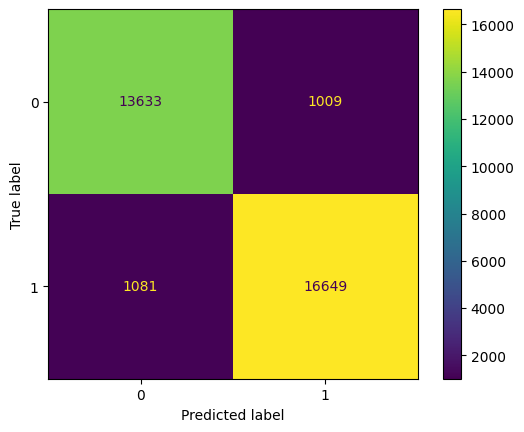

In [33]:
cm = metrics.confusion_matrix(y_test, pred_tr, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

The figure depicts high proportion of true positives and true negatives viz. the matrix accurately predicted that the customer would be satisfied or dissatified, respectively.

**Decision Tree Plot**

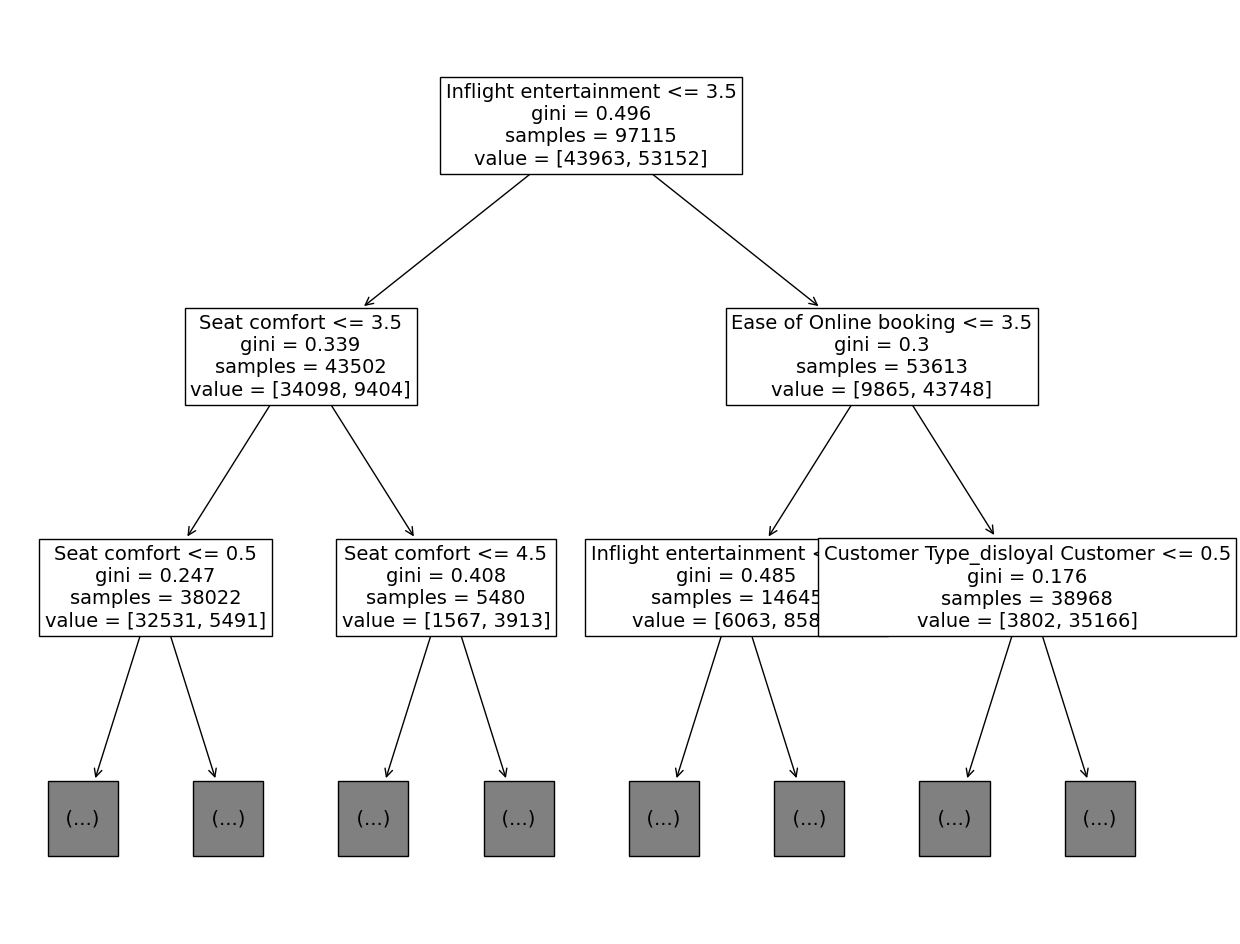

In [34]:
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns);